# ANALISIS DE DATOS DE CINE vs OSCARS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


 IMPORTACION DE DATOS

In [2]:
df =pd.read_csv("C:/Users/keyke/Documents/botcam/Data_Analyst/test/EDA ALEJO FERNANDEZ/Codigo/Src_Data/the_oscar_award.csv")


In [3]:
df2 =pd.read_csv(r"C:\Users\keyke\Documents\botcam\Data_Analyst\test\EDA ALEJO FERNANDEZ\Codigo\src\Data\Raw\tmdb_5000_movies.csv")

PRIMERA VISTA A LOS DATA FRAME 

In [4]:
df

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False
...,...,...,...,...,...,...,...
10760,2022,2023,95,HONORARY AWARD,"To Euzhan Palcy, a masterful filmmaker who bro...",NaN,True
10761,2022,2023,95,HONORARY AWARD,"To Diane Warren, for her genius, generosity an...",NaN,True
10762,2022,2023,95,HONORARY AWARD,"To Peter Weir, a fearless and consummate filmm...",NaN,True
10763,2022,2023,95,GORDON E. SAWYER AWARD,Iain Neil,NaN,True


In [5]:
df.head()

,year_film,year_ceremony,ceremony,category,name,film,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,Emil Jannings,The Last Command,True
2,1927,1928,1,ACTRESS,Louise Dresser,A Ship Comes In,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th Heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [6]:
df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [7]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [8]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
df2.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

¿TRATAMIENTO DE LAS COLUMNAS? 

In [10]:
df.columns

Index(['year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')

In [11]:
df = df.drop(['year_film', 'year_ceremony', 'ceremony'],axis=1)

In [12]:
df.head()

,category,name,film,winner
0,ACTOR,Richard Barthelmess,The Noose,False
1,ACTOR,Emil Jannings,The Last Command,True
2,ACTRESS,Louise Dresser,A Ship Comes In,False
3,ACTRESS,Janet Gaynor,7th Heaven,True
4,ACTRESS,Gloria Swanson,Sadie Thompson,False


In [13]:
df.describe()

,category,name,film,winner
count,10765,10761,10450,10765
unique,115,6952,4991,2
top,DIRECTING,Metro-Goldwyn-Mayer,A Star Is Born,False
freq,464,64,25,8327


In [14]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [15]:
df2=df2.drop(['homepage', 'id', 'keywords', 'original_language','original_title', 'overview','status', 'tagline','vote_count'],axis=1)

In [16]:
df2.head()

,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1


In [17]:
df2.describe()

,budget,popularity,revenue,runtime,vote_average
count,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172
std,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000
50%,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000
75%,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000


UNIR LOS DATOS EN UN DATAFRAME

In [18]:
df = df.rename(columns={"film": "title"})

In [19]:
pelis = df.merge(df2, on="title")

In [20]:
pelis


,category,name,title,winner,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average
0,WRITING (Original Story),Ben Hecht,Underworld,True,22000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",81.829237,"[{""name"": ""Lakeshore Entertainment"", ""id"": 126...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2003-09-19,95708457,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.6
1,ACTOR,Lewis Stone,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
2,ART DIRECTION,Hans Dreier,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
3,DIRECTING,Ernst Lubitsch,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
4,OUTSTANDING PICTURE,Paramount Famous Lasky,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,MAKEUP AND HAIRSTYLING,"Alessandro Bertolazzi, Giorgio Gregorini and C...",Suicide Squad,True,175000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",90.237920,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""D...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-08-02,745000000,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",5.9
3273,PRODUCTION DESIGN,Production Design: Jess Gonchor; Set Decoratio...,"Hail, Caesar!",False,22000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",39.006187,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-02-05,63647656,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",5.7
3274,SOUND MIXING,"Gary Summers, Jeffrey J. Haboush and Mac Ruth",13 Hours: The Secret Soldiers of Benghazi,False,50000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",42.526529,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""MT"", ""name"": ""Malta""}, {""iso_...",2016-01-13,69411370,144.0,"[{""iso_639_1"": ""ar"", ""name"": ""\u0627\u0644\u06...",7.0
3275,DOCUMENTARY (Feature),"Feras Fayyad, Kirstine Barfod and Sigrid Dyekjær",The Cave,False,30000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",10.756266,"[{""name"": ""Lakeshore Entertainment"", ""id"": 126...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-08-25,15007991,97.0,"[{""iso_639_1"": ""cs"", ""name"": ""\u010cesk\u00fd""...",5.1


In [21]:
pelis.head()

,category,name,title,winner,budget,genres,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average
0,WRITING (Original Story),Ben Hecht,Underworld,True,22000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",81.829237,"[{""name"": ""Lakeshore Entertainment"", ""id"": 126...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2003-09-19,95708457,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.6
1,ACTOR,Lewis Stone,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
2,ART DIRECTION,Hans Dreier,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
3,DIRECTING,Ernst Lubitsch,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8
4,OUTSTANDING PICTURE,Paramount Famous Lasky,The Patriot,False,110000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",23.657284,"[{""name"": ""Centropolis Entertainment"", ""id"": 3...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2000-06-28,215294342,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.8


TRATAMIENTO DE LOS DATOS DEL DATAFRAME 

In [22]:
pelis.dtypes

category                 object
name                     object
title                    object
winner                     bool
budget                    int64
genres                   object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
vote_average            float64
dtype: object

In [23]:
pelis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277 entries, 0 to 3276
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              3277 non-null   object 
 1   name                  3277 non-null   object 
 2   title                 3277 non-null   object 
 3   winner                3277 non-null   bool   
 4   budget                3277 non-null   int64  
 5   genres                3277 non-null   object 
 6   popularity            3277 non-null   float64
 7   production_companies  3277 non-null   object 
 8   production_countries  3277 non-null   object 
 9   release_date          3277 non-null   object 
 10  revenue               3277 non-null   int64  
 11  runtime               3277 non-null   float64
 12  spoken_languages      3277 non-null   object 
 13  vote_average          3277 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 361.6+ KB


In [24]:
pelis.isnull().sum()


category                0
name                    0
title                   0
winner                  0
budget                  0
genres                  0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
vote_average            0
dtype: int64

In [25]:
pelis.duplicated().sum()

5

In [26]:
# Buscar que datos hay en la columna genres
pelis.iloc[200].genres

'[{"id": 18, "name": "Drama"}]'

In [27]:
#Convertir la columna de string a una lista de diccionarios
pelis["genres"] = pelis["genres"].apply(lambda x: json.loads(x.replace("'", "\"")))

In [28]:
#Extraer los datos de ´name´
def extract_genre_name(genres):
    genre_list = []
    for genre in genres:
        genre_list.append(genre['name'])
    return genre_list
pelis["genres"] = pelis["genres"].apply(extract_genre_name)

In [29]:
#Convertir la columna de string a una lista de diccionarios
pelis['production_companies'] = pelis['production_companies'].apply(lambda x: json.loads(x))

In [30]:
#Extraer los datos de ´name´
def extract_genre_name(production_companies):
    nombre_productora = []
    for company in production_companies:
        nombre_productora.append(company["name"])
    return nombre_productora
pelis['production_companies'] = pelis['production_companies'].apply(extract_genre_name)

In [31]:
#Convertir la columna de string a una lista de diccionarios
pelis['production_countries'] = pelis['production_countries'].apply(lambda x: json.loads(x))

In [32]:
#Extraer los datos de ´name´
def extract_genre_name(production_countries):
    nombre_pais = []
    for company in production_countries:
        nombre_pais.append(company["name"])
    return nombre_pais
pelis["production_countries"] = pelis["production_countries"].apply(extract_genre_name)


In [33]:
#Convertir la columna de string a una lista de diccionarios
pelis['spoken_languages'] = pelis['spoken_languages'].apply(lambda x: json.loads(x))

In [34]:
#Extraer los datos de ´name´
def extract_genre_name(spoken_languages):
    nombre_pais = []
    for company in spoken_languages:
        nombre_pais.append(company["name"])
    return nombre_pais
pelis["spoken_languages"] = pelis["spoken_languages"].apply(extract_genre_name)

In [35]:
#Comprobar si tengo ceros en mis filas 
pelis = pelis.replace(0, np.nan) 

In [36]:
pelis.info

<bound method DataFrame.info of                       category  \
0     WRITING (Original Story)   
1                        ACTOR   
2                ART DIRECTION   
3                    DIRECTING   
4          OUTSTANDING PICTURE   
...                        ...   
3272    MAKEUP AND HAIRSTYLING   
3273         PRODUCTION DESIGN   
3274              SOUND MIXING   
3275     DOCUMENTARY (Feature)   
3276  SHORT FILM (Live Action)   

                                                   name  \
0                                             Ben Hecht   
1                                           Lewis Stone   
2                                           Hans Dreier   
3                                        Ernst Lubitsch   
4                                Paramount Famous Lasky   
...                                                 ...   
3272  Alessandro Bertolazzi, Giorgio Gregorini and C...   
3273  Production Design: Jess Gonchor; Set Decoratio...   
3274      Gary Summers, Jeff

In [37]:
pelis= pelis.dropna()

In [38]:
pelis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3275
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              2952 non-null   object 
 1   name                  2952 non-null   object 
 2   title                 2952 non-null   object 
 3   winner                2952 non-null   bool   
 4   budget                2952 non-null   float64
 5   genres                2952 non-null   object 
 6   popularity            2952 non-null   float64
 7   production_companies  2952 non-null   object 
 8   production_countries  2952 non-null   object 
 9   release_date          2952 non-null   object 
 10  revenue               2952 non-null   float64
 11  runtime               2952 non-null   float64
 12  spoken_languages      2952 non-null   object 
 13  vote_average          2952 non-null   float64
dtypes: bool(1), float64(5), object(8)
memory usage: 325.8+ KB


In [39]:
pelis.columns.values

array(['category', 'name', 'title', 'winner', 'budget', 'genres',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average'], dtype=object)

In [40]:
pelis = pelis[['title', 'budget', 'revenue', 'genres', 'production_companies', 'production_countries', 'category', 'release_date', 'vote_average', 'popularity', 'spoken_languages', 'name','winner']]


In [41]:
pelis= pelis.rename(columns={
                           "title": "Título",
                           "budget": "Presupuesto",
                           "revenue": "Recaudación",
                           "genres": "Género",
                           "production_companies":"Productora",
                           "production_countries":"País de Prodrucción",
                           "category":"Categoría Nominada",
                           "release_date" : "Fecha de Estreno",
                           "vote_average": "Puntuacion de los Criticos y Espectadores",
                           "popularity": "Popularidad",
                           "spoken_languages": "Idioma Original",
                           "name":"Nombre de candidatos",
                           "winner": "Ganador de Oscar"})

In [42]:
pelis

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar
0,Underworld,22000000.0,95708457.0,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True
1,The Patriot,110000000.0,215294342.0,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False
2,The Patriot,110000000.0,215294342.0,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False
3,The Patriot,110000000.0,215294342.0,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False
4,The Patriot,110000000.0,215294342.0,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Star Trek Beyond,185000000.0,343471816.0,"[Action, Adventure, Science Fiction]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],MAKEUP AND HAIRSTYLING,2016-07-07,6.6,65.352913,[English],Joel Harlow and Richard Alonzo,False
3272,Suicide Squad,175000000.0,745000000.0,"[Action, Adventure, Crime, Fantasy, Science Fi...","[DC Comics, Dune Entertainment, Atlas Entertai...",[United States of America],MAKEUP AND HAIRSTYLING,2016-08-02,5.9,90.237920,[English],"Alessandro Bertolazzi, Giorgio Gregorini and C...",True
3273,"Hail, Caesar!",22000000.0,63647656.0,"[Comedy, Drama, Mystery]","[Universal Pictures, Mike Zoss Productions, Wo...",[United States of America],PRODUCTION DESIGN,2016-02-05,5.7,39.006187,[English],Production Design: Jess Gonchor; Set Decoratio...,False
3274,13 Hours: The Secret Soldiers of Benghazi,50000000.0,69411370.0,"[Action, Drama, History, Thriller, War]","[Paramount Pictures, 3 Arts Entertainment, Bay...","[Malta, Morocco, United States of America]",SOUND MIXING,2016-01-13,7.0,42.526529,"[العربية, English]","Gary Summers, Jeffrey J. Haboush and Mac Ruth",False


In [43]:
#Quiero pasar de Float a Enteros las columas de  Recaudación 
pelis["Recaudación"] = pelis["Recaudación"].astype(int)
#Quiero pasar de Float a Entero a la Columna Presupesto
pelis["Presupuesto"] = pelis["Presupuesto"].astype(float).astype(int)





C:\Users\keyke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)


In [44]:
pelis

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True
1,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False
2,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False
3,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False
4,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Star Trek Beyond,185000000,343471816,"[Action, Adventure, Science Fiction]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],MAKEUP AND HAIRSTYLING,2016-07-07,6.6,65.352913,[English],Joel Harlow and Richard Alonzo,False
3272,Suicide Squad,175000000,745000000,"[Action, Adventure, Crime, Fantasy, Science Fi...","[DC Comics, Dune Entertainment, Atlas Entertai...",[United States of America],MAKEUP AND HAIRSTYLING,2016-08-02,5.9,90.237920,[English],"Alessandro Bertolazzi, Giorgio Gregorini and C...",True
3273,"Hail, Caesar!",22000000,63647656,"[Comedy, Drama, Mystery]","[Universal Pictures, Mike Zoss Productions, Wo...",[United States of America],PRODUCTION DESIGN,2016-02-05,5.7,39.006187,[English],Production Design: Jess Gonchor; Set Decoratio...,False
3274,13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,"[Action, Drama, History, Thriller, War]","[Paramount Pictures, 3 Arts Entertainment, Bay...","[Malta, Morocco, United States of America]",SOUND MIXING,2016-01-13,7.0,42.526529,"[العربية, English]","Gary Summers, Jeffrey J. Haboush and Mac Ruth",False


CREAR UNA NUEVA SERIE 

In [45]:
pelis["Beneficio"] = pelis["Recaudación"] - pelis["Presupuesto"]


In [46]:
pelis

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True,73708457
1,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False,105294342
2,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False,105294342
3,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False,105294342
4,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False,105294342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Star Trek Beyond,185000000,343471816,"[Action, Adventure, Science Fiction]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],MAKEUP AND HAIRSTYLING,2016-07-07,6.6,65.352913,[English],Joel Harlow and Richard Alonzo,False,158471816
3272,Suicide Squad,175000000,745000000,"[Action, Adventure, Crime, Fantasy, Science Fi...","[DC Comics, Dune Entertainment, Atlas Entertai...",[United States of America],MAKEUP AND HAIRSTYLING,2016-08-02,5.9,90.237920,[English],"Alessandro Bertolazzi, Giorgio Gregorini and C...",True,570000000
3273,"Hail, Caesar!",22000000,63647656,"[Comedy, Drama, Mystery]","[Universal Pictures, Mike Zoss Productions, Wo...",[United States of America],PRODUCTION DESIGN,2016-02-05,5.7,39.006187,[English],Production Design: Jess Gonchor; Set Decoratio...,False,41647656
3274,13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,"[Action, Drama, History, Thriller, War]","[Paramount Pictures, 3 Arts Entertainment, Bay...","[Malta, Morocco, United States of America]",SOUND MIXING,2016-01-13,7.0,42.526529,"[العربية, English]","Gary Summers, Jeffrey J. Haboush and Mac Ruth",False,19411370


In [47]:
pelis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 3275
Data columns (total 14 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Título                                     2952 non-null   object 
 1   Presupuesto                                2952 non-null   int32  
 2   Recaudación                                2952 non-null   int32  
 3   Género                                     2952 non-null   object 
 4   Productora                                 2952 non-null   object 
 5   País de Prodrucción                        2952 non-null   object 
 6   Categoría Nominada                         2952 non-null   object 
 7   Fecha de Estreno                           2952 non-null   object 
 8   Puntuacion de los Criticos y Espectadores  2952 non-null   float64
 9   Popularidad                                2952 non-null   float64
 10  Idioma Original         

In [48]:
pelis.dropna()

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True,73708457
1,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False,105294342
2,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False,105294342
3,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False,105294342
4,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False,105294342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Star Trek Beyond,185000000,343471816,"[Action, Adventure, Science Fiction]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],MAKEUP AND HAIRSTYLING,2016-07-07,6.6,65.352913,[English],Joel Harlow and Richard Alonzo,False,158471816
3272,Suicide Squad,175000000,745000000,"[Action, Adventure, Crime, Fantasy, Science Fi...","[DC Comics, Dune Entertainment, Atlas Entertai...",[United States of America],MAKEUP AND HAIRSTYLING,2016-08-02,5.9,90.237920,[English],"Alessandro Bertolazzi, Giorgio Gregorini and C...",True,570000000
3273,"Hail, Caesar!",22000000,63647656,"[Comedy, Drama, Mystery]","[Universal Pictures, Mike Zoss Productions, Wo...",[United States of America],PRODUCTION DESIGN,2016-02-05,5.7,39.006187,[English],Production Design: Jess Gonchor; Set Decoratio...,False,41647656
3274,13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,"[Action, Drama, History, Thriller, War]","[Paramount Pictures, 3 Arts Entertainment, Bay...","[Malta, Morocco, United States of America]",SOUND MIXING,2016-01-13,7.0,42.526529,"[العربية, English]","Gary Summers, Jeffrey J. Haboush and Mac Ruth",False,19411370


GUARDAR MI DATASET

In [49]:
master_pelis= pelis

In [50]:
#master_pelis.to_csv("C:/Users/keyke/Documents/botcam/Data_Analyst/test/EDA ALEJO FERNANDEZ/Codigo/src/Data/Processed/master_pelis.csv",index=False)


VISION GENERAL 

In [51]:
master_pelis.describe(include="all")

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
count,2952,2.952000e+03,2.952000e+03,2952,2952,2952,2952,2952,2952.000000,2952.000000,2952,2952,2952,2.952000e+03
unique,823,NaN,NaN,361,691,126,90,781,NaN,NaN,168,2288,2,NaN
top,West Side Story,NaN,NaN,[Drama],[Paramount Pictures],[United States of America],FILM EDITING,1984-12-14,NaN,NaN,[English],John Williams,False,NaN
freq,18,NaN,NaN,413,74,1909,201,24,NaN,NaN,1715,27,2127,NaN
mean,NaN,4.345768e+07,1.984694e+08,NaN,NaN,NaN,NaN,NaN,7.155488,44.303304,NaN,NaN,NaN,1.681061e+08
std,NaN,5.053448e+07,2.880052e+08,NaN,NaN,NaN,NaN,NaN,0.633310,52.149630,NaN,NaN,NaN,2.460427e+08
min,NaN,4.000000e+00,-2.147484e+09,NaN,NaN,NaN,NaN,NaN,3.800000,0.178689,NaN,NaN,NaN,-1.657101e+08
25%,NaN,8.000000e+06,3.760000e+07,NaN,NaN,NaN,NaN,NaN,6.800000,17.234745,NaN,NaN,NaN,2.067072e+07
50%,NaN,2.500000e+07,1.167000e+08,NaN,NaN,NaN,NaN,NaN,7.200000,31.051437,NaN,NaN,NaN,8.116327e+07
75%,NaN,6.000000e+07,2.727429e+08,NaN,NaN,NaN,NaN,NaN,7.600000,54.053576,NaN,NaN,NaN,2.195557e+08


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


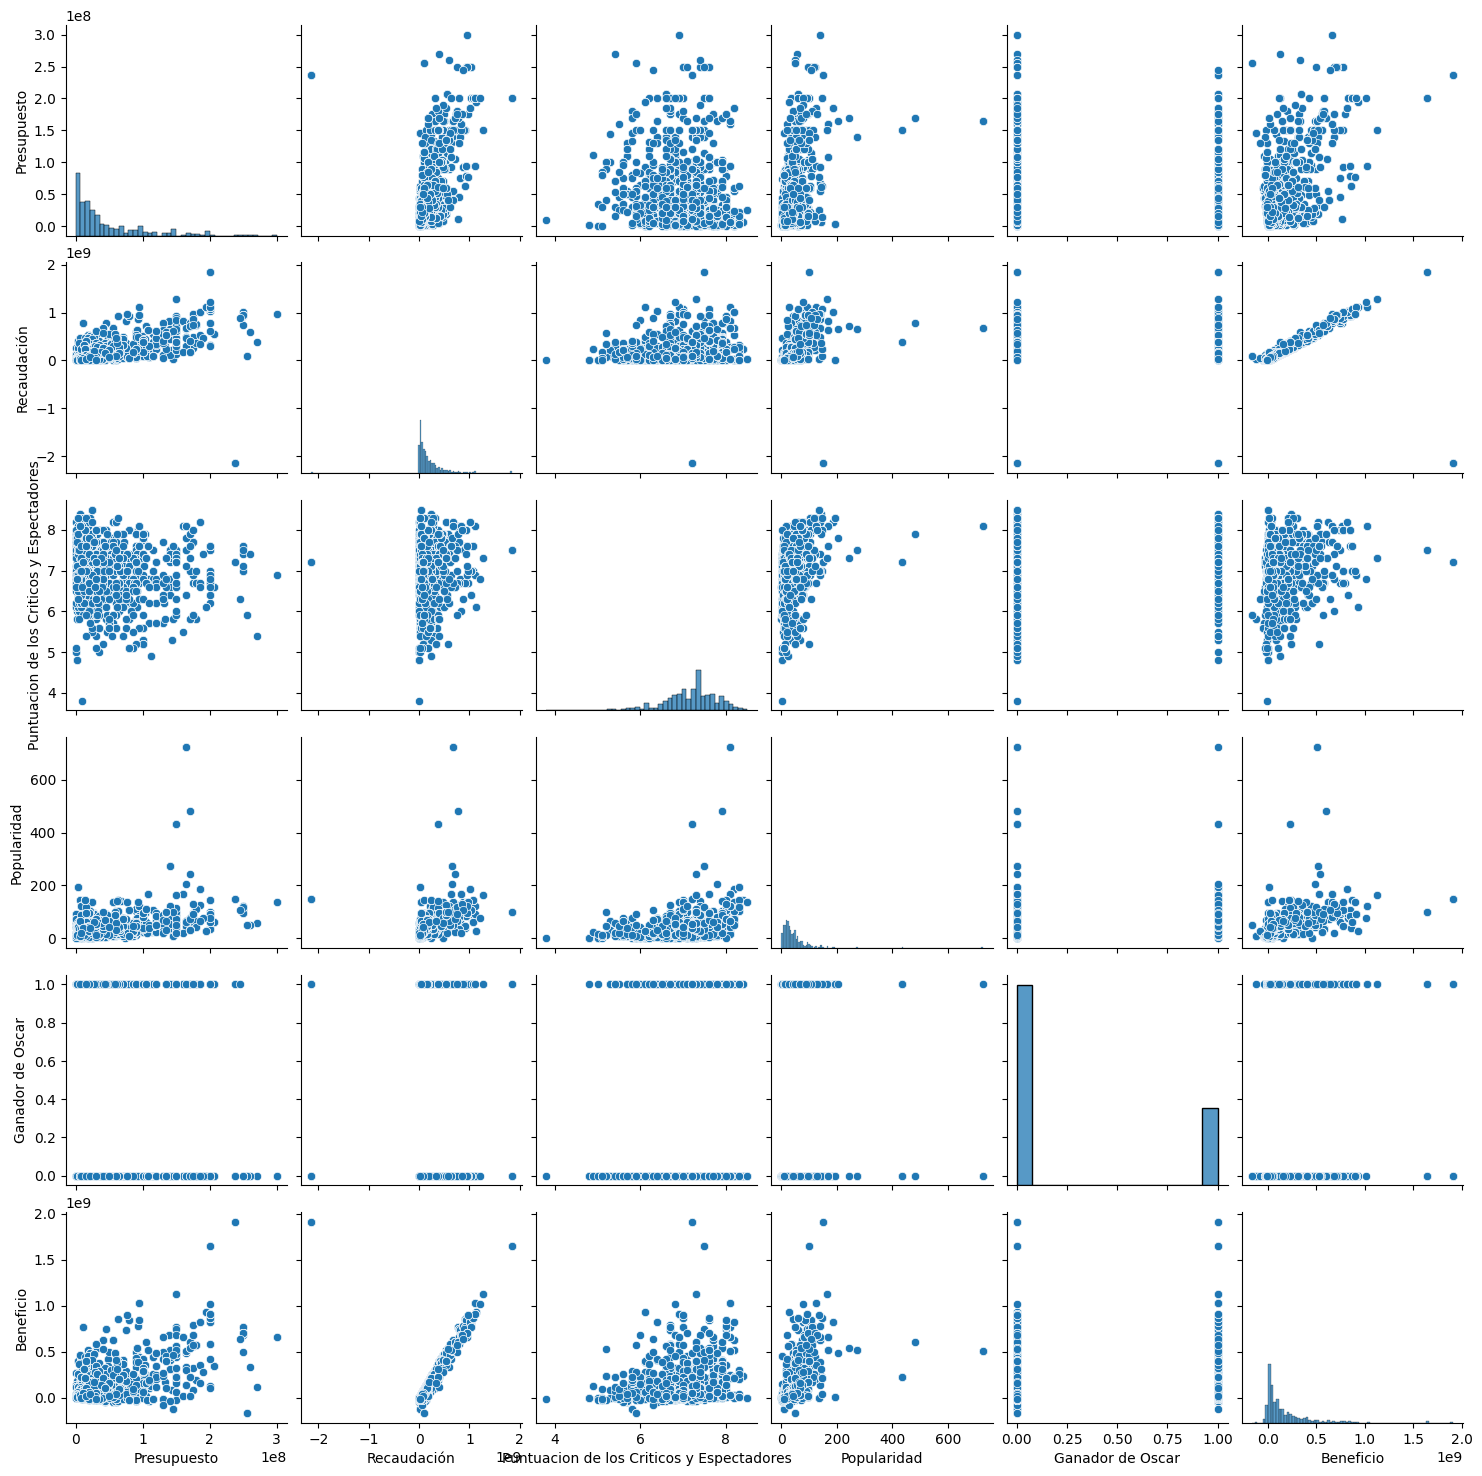

In [52]:

sns.pairplot(master_pelis)

C:\Users\keyke\AppData\Local\Temp\ipykernel_11708\149293221.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(master_pelis.corr(),annot=True,cmap="viridis")


<Axes: >

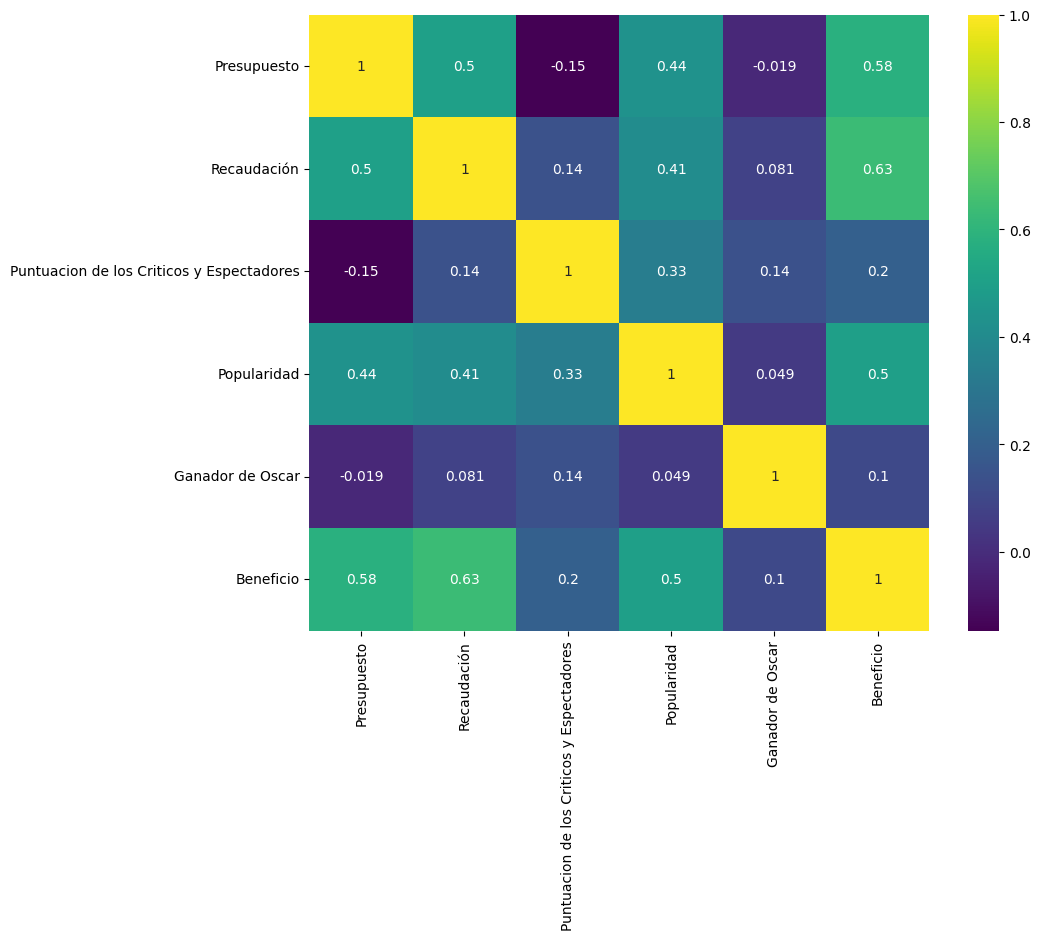

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(master_pelis.corr(),annot=True,cmap="viridis")

ANALISIS UNIVARIANTE 

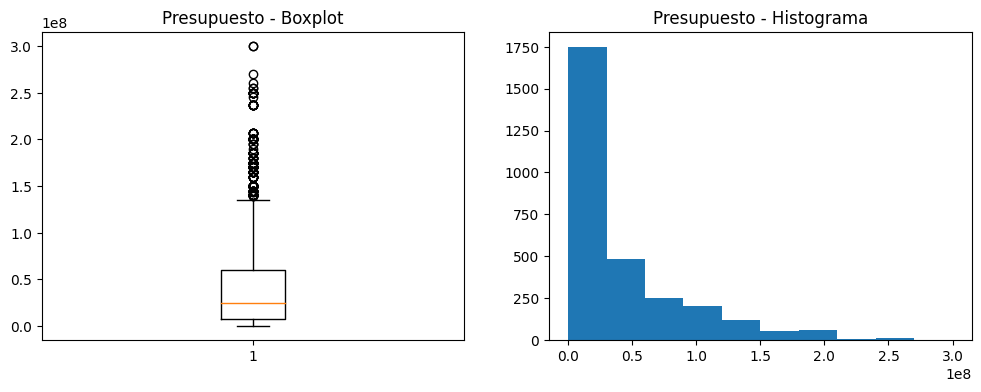

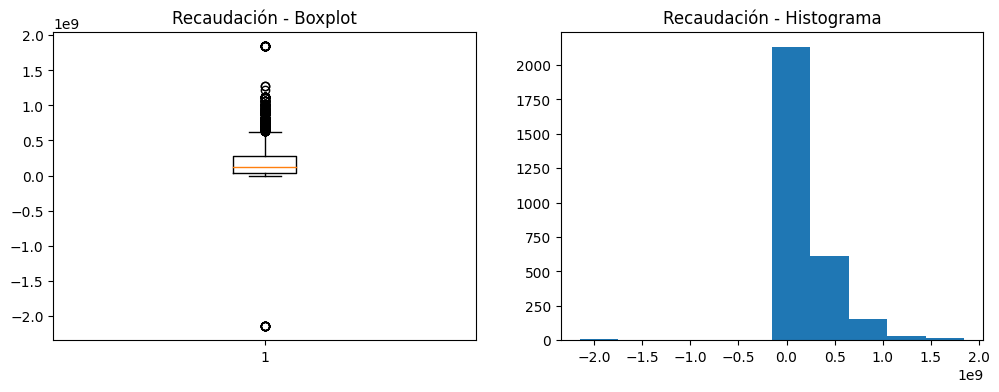

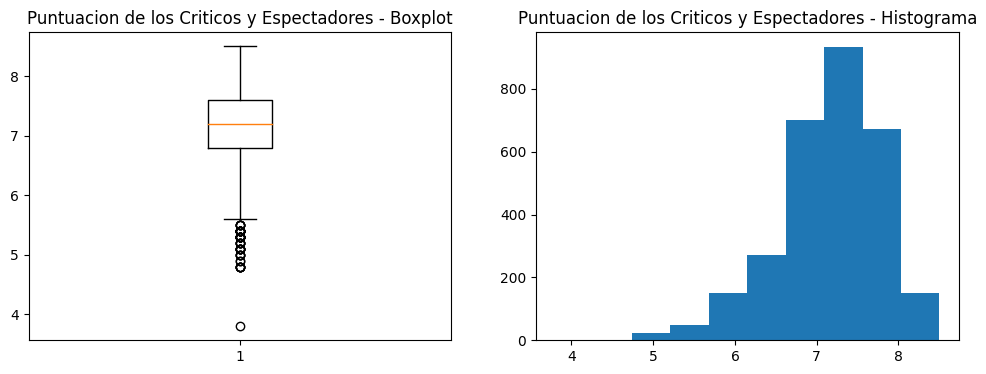

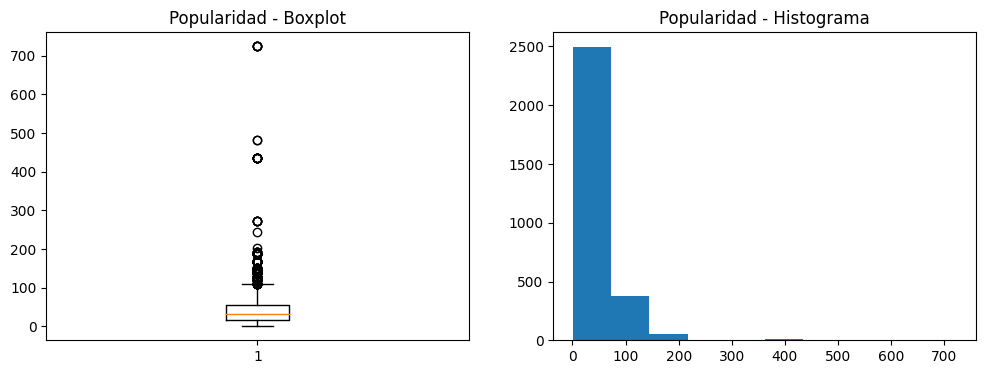

In [54]:
for col in master_pelis.columns:
    if col in ["Presupuesto", "Recaudación", "Puntuacion de los Criticos y Espectadores", "Popularidad"]:
        fig, axs = plt.subplots(1, 2, figsize=(12,4))

        # Boxplot
        axs[0].boxplot(master_pelis[col])
        axs[0].set_title(f'{col} - Boxplot')

        # Histograma
        axs[1].hist(master_pelis[col])
        axs[1].set_title(f'{col} - Histograma')

        plt.show()

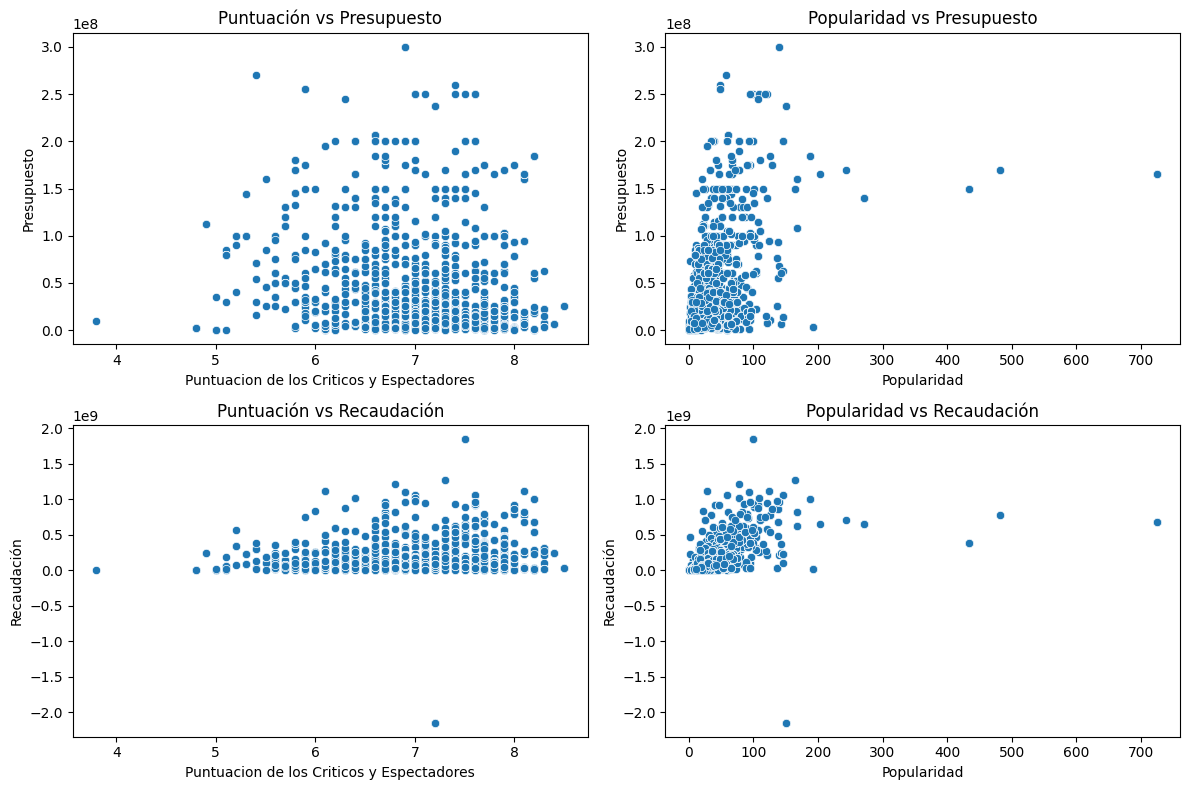

In [55]:

subset = master_pelis[["Presupuesto", "Recaudación", "Puntuacion de los Criticos y Espectadores", "Popularidad"]]

# Crear gráficos
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))

sns.scatterplot(x="Puntuacion de los Criticos y Espectadores", y="Presupuesto", data=subset, ax=axs[0, 0])
axs[0, 0].set_title("Puntuación vs Presupuesto")

sns.scatterplot(x="Popularidad", y="Presupuesto", data=subset, ax=axs[0, 1])
axs[0, 1].set_title("Popularidad vs Presupuesto")

sns.scatterplot(x="Puntuacion de los Criticos y Espectadores", y="Recaudación", data=subset, ax=axs[1, 0])
axs[1, 0].set_title("Puntuación vs Recaudación")

sns.scatterplot(x="Popularidad", y="Recaudación", data=subset, ax=axs[1, 1])
axs[1, 1].set_title("Popularidad vs Recaudación")

plt.tight_layout()
plt.show()


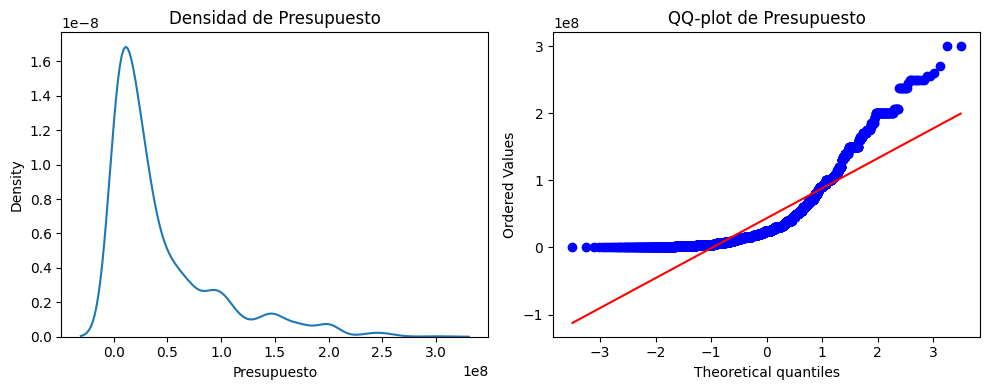

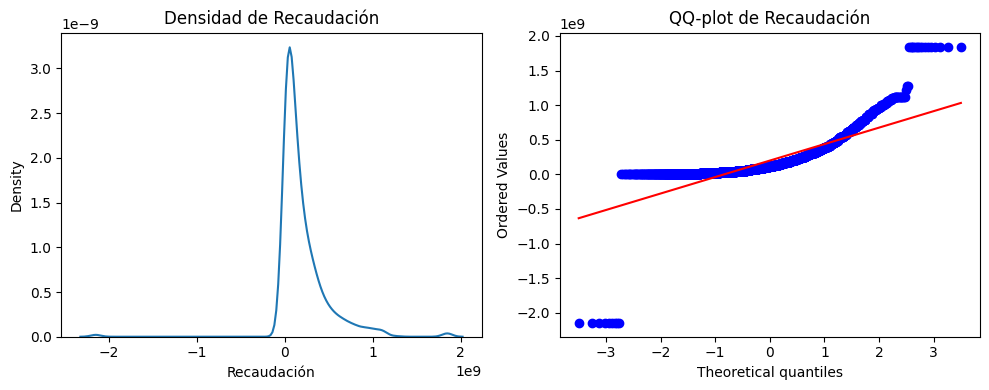

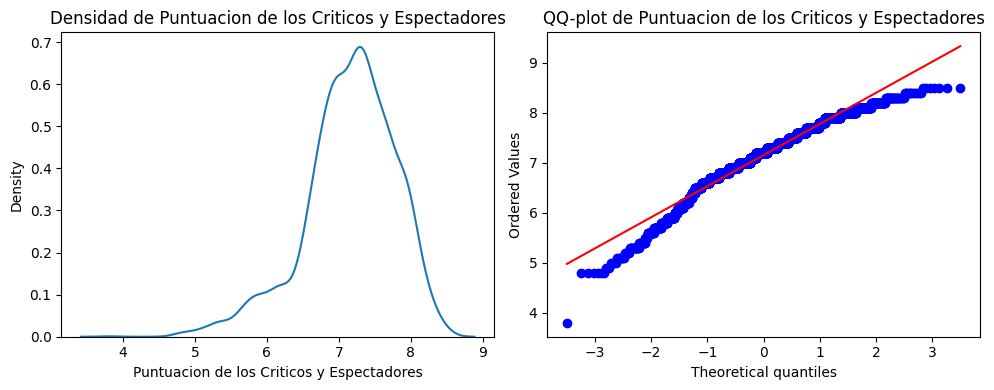

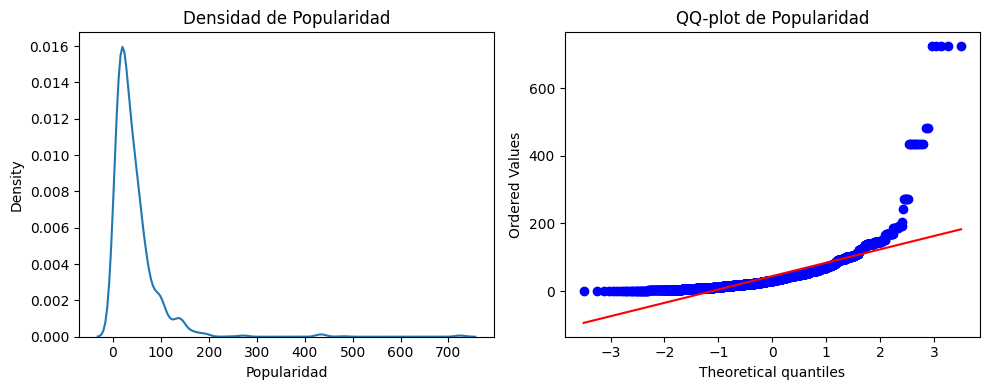

In [56]:
for col in ["Presupuesto","Recaudación","Puntuacion de los Criticos y Espectadores","Popularidad"]:
    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
    
    # Densidad
    sns.kdeplot(data=master_pelis, x=col, ax=axs[0])
    axs[0].set_title(f"Densidad de {col}")
    
    # QQ-plot
    stats.probplot(master_pelis[col], dist="norm", plot=axs[1])
    axs[1].set_title(f"QQ-plot de {col}")
    
    plt.tight_layout()
    plt.show()

CREAR UN DATA FRAME PARA COMPARAR LOS BENEFICIOS

In [57]:
beneficio = master_pelis.loc[:, ["Título", "Beneficio", "Ganador de Oscar"]]


In [58]:
beneficio

,Título,Beneficio,Ganador de Oscar
0,Underworld,73708457,True
1,The Patriot,105294342,False
2,The Patriot,105294342,False
3,The Patriot,105294342,False
4,The Patriot,105294342,False
...,...,...,...
3271,Star Trek Beyond,158471816,False
3272,Suicide Squad,570000000,True
3273,"Hail, Caesar!",41647656,False
3274,13 Hours: The Secret Soldiers of Benghazi,19411370,False


C:\Users\keyke\AppData\Local\Temp\ipykernel_11708\2824303590.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ganadoras = master_pelis[master_pelis['Ganador de Oscar']==True].mean()[['Presupuesto', 'Recaudación']]
C:\Users\keyke\AppData\Local\Temp\ipykernel_11708\2824303590.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  candidatas= master_pelis[master_pelis['Ganador de Oscar']==False].mean()[['Presupuesto', 'Recaudación']]


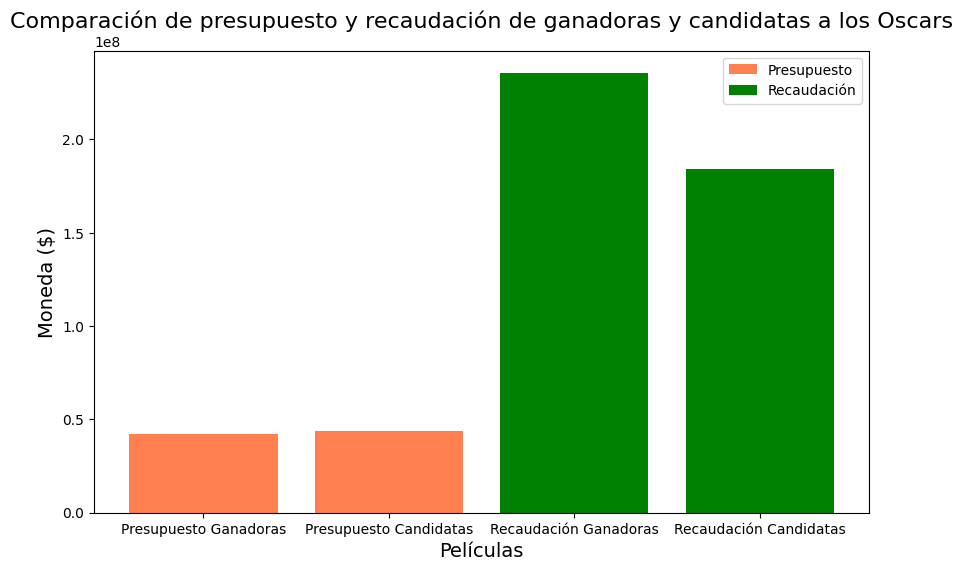

In [59]:
# Calcular el presupuesto y la recaudación promedio de las películas ganadoras y candidatas
ganadoras = master_pelis[master_pelis['Ganador de Oscar']==True].mean()[['Presupuesto', 'Recaudación']]
candidatas= master_pelis[master_pelis['Ganador de Oscar']==False].mean()[['Presupuesto', 'Recaudación']]

# Crear la figura de gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las barras de presupuesto y recaudación
ax.bar(['Presupuesto Ganadoras', 'Presupuesto Candidatas'], [ganadoras['Presupuesto'], candidatas['Presupuesto']],color='coral', label='Presupuesto')
ax.bar(['Recaudación Ganadoras', 'Recaudación Candidatas'], [ganadoras['Recaudación'], candidatas['Recaudación']],color='green', label='Recaudación')

# Añadir etiquetas y leyenda
ax.set_xlabel('Películas', fontsize=14)
ax.set_ylabel('Moneda ($)', fontsize=14)
ax.set_title('Comparación de presupuesto y recaudación de ganadoras y candidatas a los Oscars', fontsize=16)
ax.legend()

# Mostrar el gráfico
plt.show()


REALACION ENTRE PRESUPUESTO Y BENEFICIO

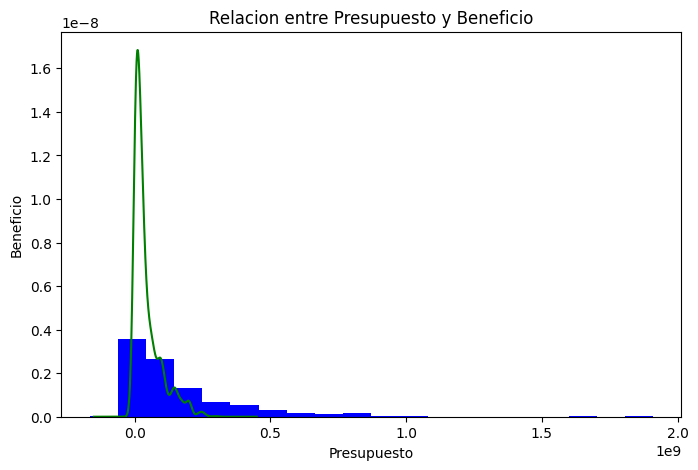

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
master_pelis["Presupuesto"].plot(kind="kde", color="green", ax=ax)
ax.hist(master_pelis["Beneficio"], bins=20, density=True, color="blue")
ax.set_xlabel("Presupuesto")
ax.set_ylabel("Beneficio")
ax.set_title("Relacion entre Presupuesto y Beneficio")

plt.show()



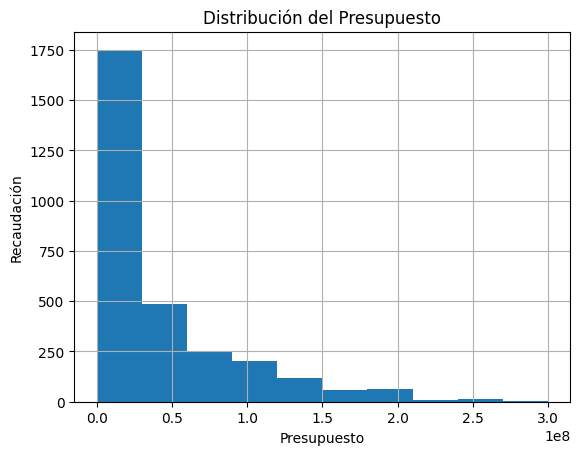

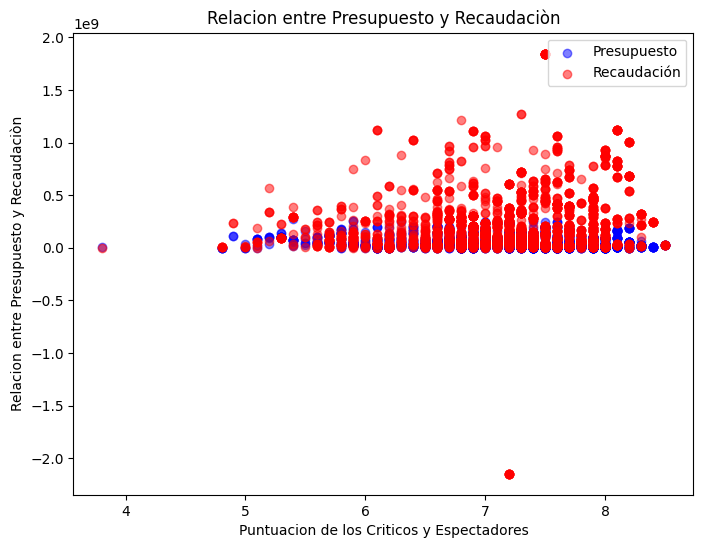

In [65]:


# Histogram of Budget
master_pelis["Presupuesto"].hist()
plt.xlabel("Presupuesto")
plt.ylabel("Recaudación")
plt.title("Distribución del Presupuesto")

plt.show()


fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(master_pelis["Puntuacion de los Criticos y Espectadores"], master_pelis["Presupuesto"], color="blue", alpha=0.5, label="Presupuesto")
ax.scatter(master_pelis["Puntuacion de los Criticos y Espectadores"], master_pelis["Recaudación"], color="red", alpha=0.5, label="Recaudación")
ax.set_xlabel("Puntuacion de los Criticos y Espectadores")
ax.set_ylabel("Relacion entre Presupuesto y Recaudaciòn")
ax.set_title("Relacion entre Presupuesto y Recaudaciòn")
ax.legend()

plt.show()


ValueError: Puntuacion is not a valid plot kind

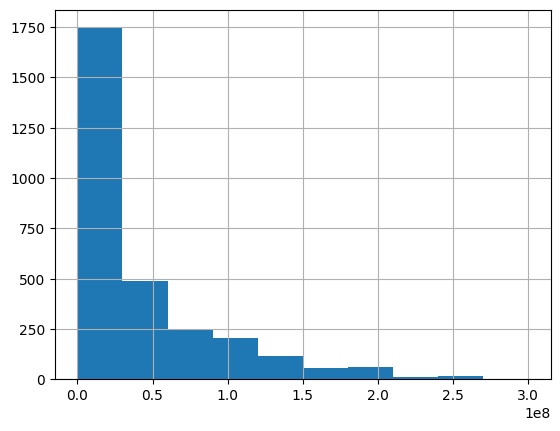

In [62]:
pelis["Presupuesto"].hist()

pelis["Puntuacion de los Criticos y Espectadores"].plot(kind="Puntuacion")

ax.set_xlabel("Puntuacion de los Criticos y Espectadores")
ax.set_ylabel("Presupuesto")
ax.set_title("Relacion entre presupuesto y Recaudaion")


In [ ]:
master_pelis.head()

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True,73708457
1,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False,105294342
2,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False,105294342
3,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False,105294342
4,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False,105294342


REPRESENTACION DEL GENERO MAS COMUN 

In [ ]:
genero= pd.DataFrame(master_pelis["Género"])

In [ ]:
genero

,Género
0,"[Fantasy, Action, Thriller]"
1,"[Drama, History, War, Action]"
2,"[Drama, History, War, Action]"
3,"[Drama, History, War, Action]"
4,"[Drama, History, War, Action]"
...,...
3271,"[Action, Adventure, Science Fiction]"
3272,"[Action, Adventure, Crime, Fantasy, Science Fi..."
3273,"[Comedy, Drama, Mystery]"
3274,"[Action, Drama, History, Thriller, War]"


In [ ]:
genero["Género"].explode().unique()

array(['Fantasy', 'Action', 'Thriller', 'Drama', 'History', 'War',
       'Music', 'Romance', 'Comedy', 'Adventure', 'Science Fiction',
       'Animation', 'Family', 'Mystery', 'Western', 'Horror', 'Crime',
       'Documentary'], dtype=object)

In [ ]:
genero_count = genero['Género'].apply(pd.Series).stack().value_counts()
print(genero_count)

Drama              2185
Romance             697
Adventure           590
Action              566
Thriller            525
Comedy              506
History             469
Crime               349
War                 309
Fantasy             273
Family              267
Science Fiction     243
Music               200
Mystery             165
Animation           128
Western              95
Horror               50
Documentary          17
dtype: int64


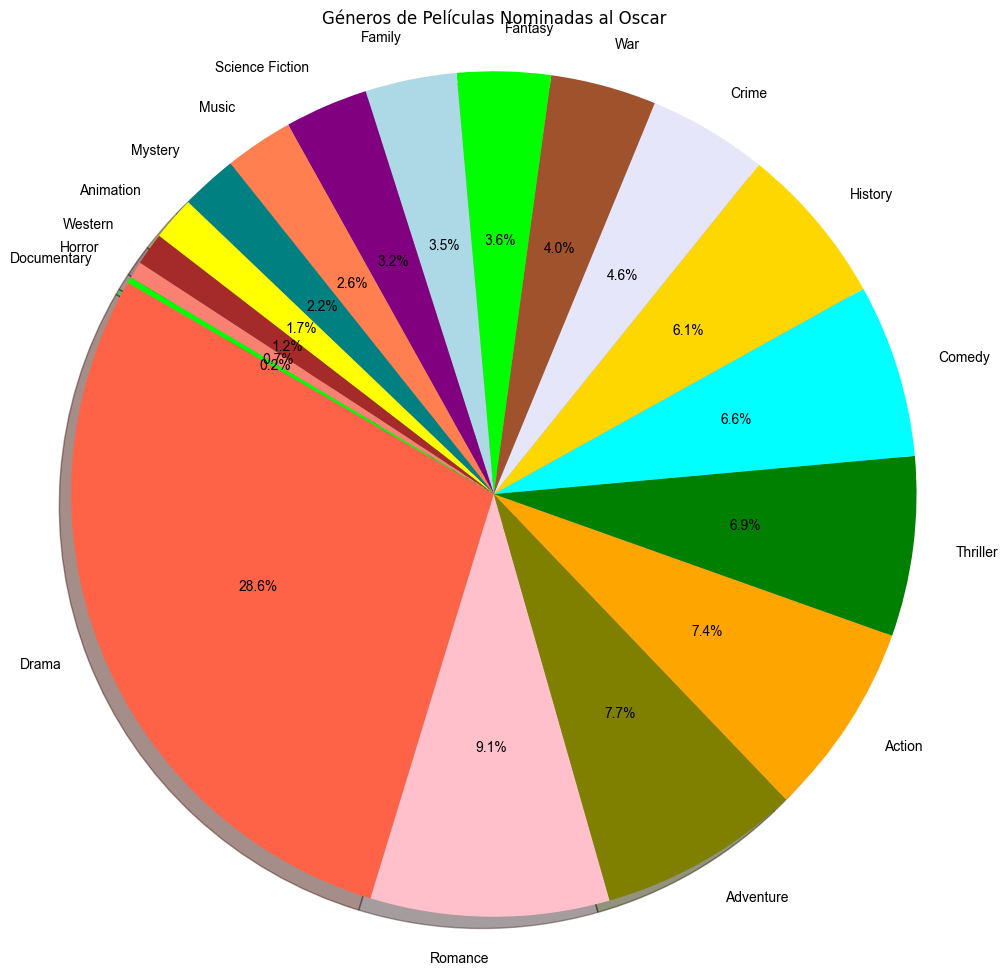

In [ ]:
fig = plt.figure(figsize=(12,12))
colores = ['tomato', 'pink', 'olive', 'orange', 'green', 'cyan', 'gold', 'lavender', 'sienna', 'lime', 'lightblue',
           'purple', 'coral', 'teal', 'yellow', 'brown', 'salmon', 'lime', 'indigo']
plt.pie(genero_count.values, labels=genero_count.index, colors=colores, autopct='%1.1f%%',shadow=True, startangle=150, textprops={'fontname': 'Arial'})
plt.axis('equal')  
plt.title('Géneros de Películas Nominadas al Oscar')
plt.show()

PRODUCTORA QUE HA SIDO MAS NOMINADA

In [ ]:
produtora = master_pelis["Productora"].apply(pd.Series).stack().value_counts()
print(produtora)

Warner Bros.                                        371
Paramount Pictures                                  301
Universal Pictures                                  289
Twentieth Century Fox Film Corporation              274
Columbia Pictures                                   159
                                                   ... 
Stonebridge Entertainment                             1
Easy There Tiger Productions                          1
Nelson Entertainment                                  1
New Zealand Large Budget Screen Production Grant      1
City Productions                                      1
Length: 1218, dtype: int64


C:\Users\keyke\AppData\Local\Temp\ipykernel_22692\1644648491.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  produtora = master_pelis["Productora"].apply(pd.Series).stack().value_counts()


In [ ]:
top_20_prod = produtora.head(20)

In [ ]:
top_20_prod

Warner Bros.                              371
Paramount Pictures                        301
Universal Pictures                        289
Twentieth Century Fox Film Corporation    274
Columbia Pictures                         159
United Artists                            155
Miramax Films                             147
Columbia Pictures Corporation             130
DreamWorks SKG                            125
Metro-Goldwyn-Mayer (MGM)                 112
Amblin Entertainment                      107
Scott Rudin Productions                    92
Walt Disney Pictures                       88
Touchstone Pictures                        80
New Line Cinema                            68
Fox Searchlight Pictures                   67
The Weinstein Company                      60
Relativity Media                           55
TriStar Pictures                           54
Working Title Films                        54
dtype: int64

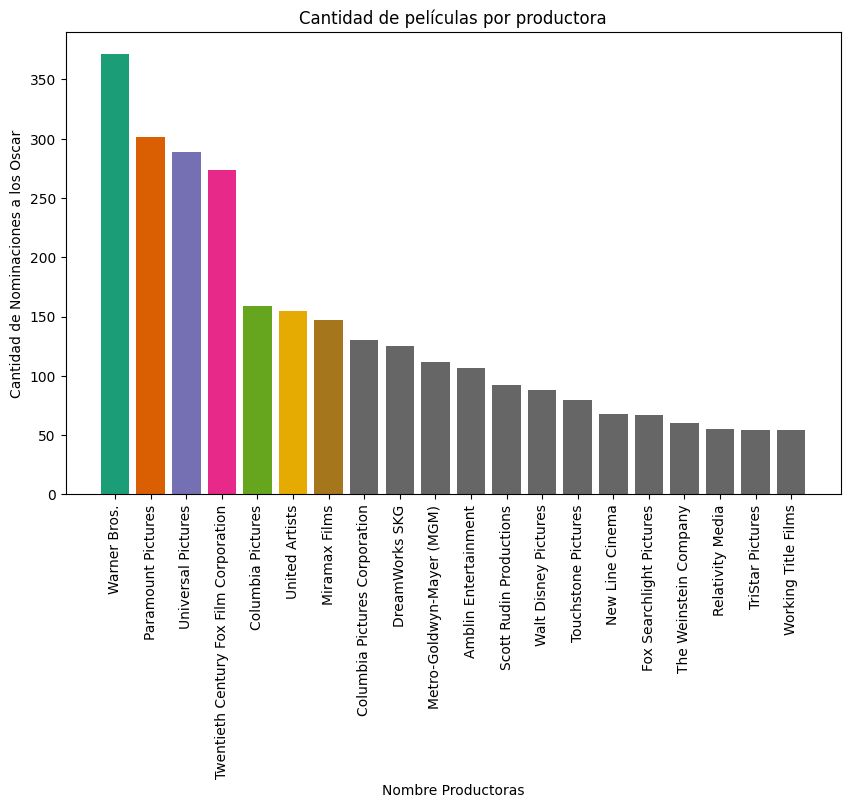

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
colores = plt.cm.Dark2(np.arange(len(top_20_prod)))
plt.bar(top_20_prod.index, top_20_prod.values, color=colores)


plt.title("Cantidad de películas por productora")
plt.xlabel("Nombre Productoras")
plt.ylabel("Cantidad de Nominaciones a los Oscar")
plt.xticks(rotation=90)


plt.show()

PAISES DE PRODUCCION 

In [ ]:
produccion= master_pelis["País de Prodrucción"].apply(pd.Series).stack().value_counts()
print(produccion)

C:\Users\keyke\AppData\Local\Temp\ipykernel_22692\3015366837.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  produccion= master_pelis["País de Prodrucción"].apply(pd.Series).stack().value_counts()


United States of America    2708
United Kingdom               593
Germany                      162
France                       158
Canada                       100
New Zealand                   66
Italy                         61
Japan                         44
India                         44
Australia                     41
China                         34
Taiwan                        33
Hong Kong                     31
Ireland                       30
Spain                         20
Mexico                        20
Switzerland                   15
Belgium                       14
South Africa                   9
Poland                         9
Romania                        8
Norway                         8
Sweden                         7
Austria                        6
Brazil                         6
Hungary                        6
Denmark                        5
Bahamas                        5
Dominica                       4
Jamaica                        4
United Ara

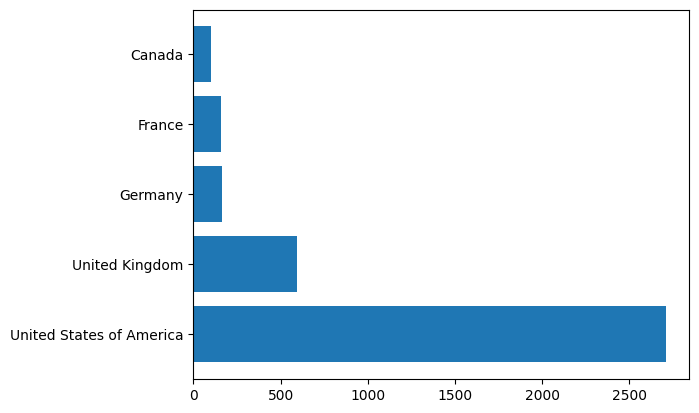

In [ ]:
produccion=produccion.head(5)
fig, ax = plt.subplots()
ax.barh(produccion.index,produccion.values)
plt.show()

PELICULAS MAS POPULARES 

In [ ]:
master_pelis

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True,73708457
1,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ACTOR,2000-06-28,6.8,23.657284,[English],Lewis Stone,False,105294342
2,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",ART DIRECTION,2000-06-28,6.8,23.657284,[English],Hans Dreier,False,105294342
3,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",DIRECTING,2000-06-28,6.8,23.657284,[English],Ernst Lubitsch,False,105294342
4,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",OUTSTANDING PICTURE,2000-06-28,6.8,23.657284,[English],Paramount Famous Lasky,False,105294342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,Star Trek Beyond,185000000,343471816,"[Action, Adventure, Science Fiction]","[Paramount Pictures, Bad Robot, Perfect Storm ...",[United States of America],MAKEUP AND HAIRSTYLING,2016-07-07,6.6,65.352913,[English],Joel Harlow and Richard Alonzo,False,158471816
3272,Suicide Squad,175000000,745000000,"[Action, Adventure, Crime, Fantasy, Science Fi...","[DC Comics, Dune Entertainment, Atlas Entertai...",[United States of America],MAKEUP AND HAIRSTYLING,2016-08-02,5.9,90.237920,[English],"Alessandro Bertolazzi, Giorgio Gregorini and C...",True,570000000
3273,"Hail, Caesar!",22000000,63647656,"[Comedy, Drama, Mystery]","[Universal Pictures, Mike Zoss Productions, Wo...",[United States of America],PRODUCTION DESIGN,2016-02-05,5.7,39.006187,[English],Production Design: Jess Gonchor; Set Decoratio...,False,41647656
3274,13 Hours: The Secret Soldiers of Benghazi,50000000,69411370,"[Action, Drama, History, Thriller, War]","[Paramount Pictures, 3 Arts Entertainment, Bay...","[Malta, Morocco, United States of America]",SOUND MIXING,2016-01-13,7.0,42.526529,"[العربية, English]","Gary Summers, Jeffrey J. Haboush and Mac Ruth",False,19411370


In [ ]:
popularidad = pelis[["Popularidad", "Título","Presupuesto"]]

In [ ]:
popularidad

,Popularidad,Título,Presupuesto
0,81.829237,Underworld,22000000
1,23.657284,The Patriot,110000000
2,23.657284,The Patriot,110000000
3,23.657284,The Patriot,110000000
4,23.657284,The Patriot,110000000
...,...,...,...
3271,65.352913,Star Trek Beyond,185000000
3272,90.237920,Suicide Squad,175000000
3273,39.006187,"Hail, Caesar!",22000000
3274,42.526529,13 Hours: The Secret Soldiers of Benghazi,50000000


In [ ]:
popularidad= popularidad.sort_values(by="Popularidad", ascending=False)[["Título", "Popularidad"]]
popularidad= popularidad.drop_duplicates()
print(popularidad)

                                                 Título  Popularidad
3182                                       Interstellar   724.247784
3180                            Guardians of the Galaxy   481.098624
3257                                 Mad Max: Fury Road   434.278564
2170  Pirates of the Caribbean: The Curse of the Bla...   271.972889
3195                     Dawn of the Planet of the Apes   243.791743
...                                                 ...          ...
199                                     A Guy Named Joe     0.531444
1071                                         Heartbeeps     0.518056
96                             Alexander's Ragtime Band     0.483974
215                              The Valley of Decision     0.181300
683                                              Charly     0.178689

[823 rows x 2 columns]


In [ ]:
top_10_peliculas= popularidad.head(10)

In [ ]:
top_10_peliculas

,Título,Popularidad,Presupuesto
3182,Interstellar,724.247784,165000000.0
3180,Guardians of the Galaxy,481.098624,170000000.0
3257,Mad Max: Fury Road,434.278564,150000000.0
2170,Pirates of the Caribbean: The Curse of the Bla...,271.972889,140000000.0
3195,Dawn of the Planet of the Apes,243.791743,170000000.0
3156,Big Hero 6,203.734590,165000000.0
3148,Whiplash,192.528841,3300000.0
2623,The Dark Knight,187.322927,185000000.0
3198,The Martian,167.932870,108000000.0
2817,Inception,167.583710,160000000.0


C:\Users\keyke\AppData\Local\Temp\ipykernel_22692\1932718859.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_10_peliculas["Título"], rotation=90)


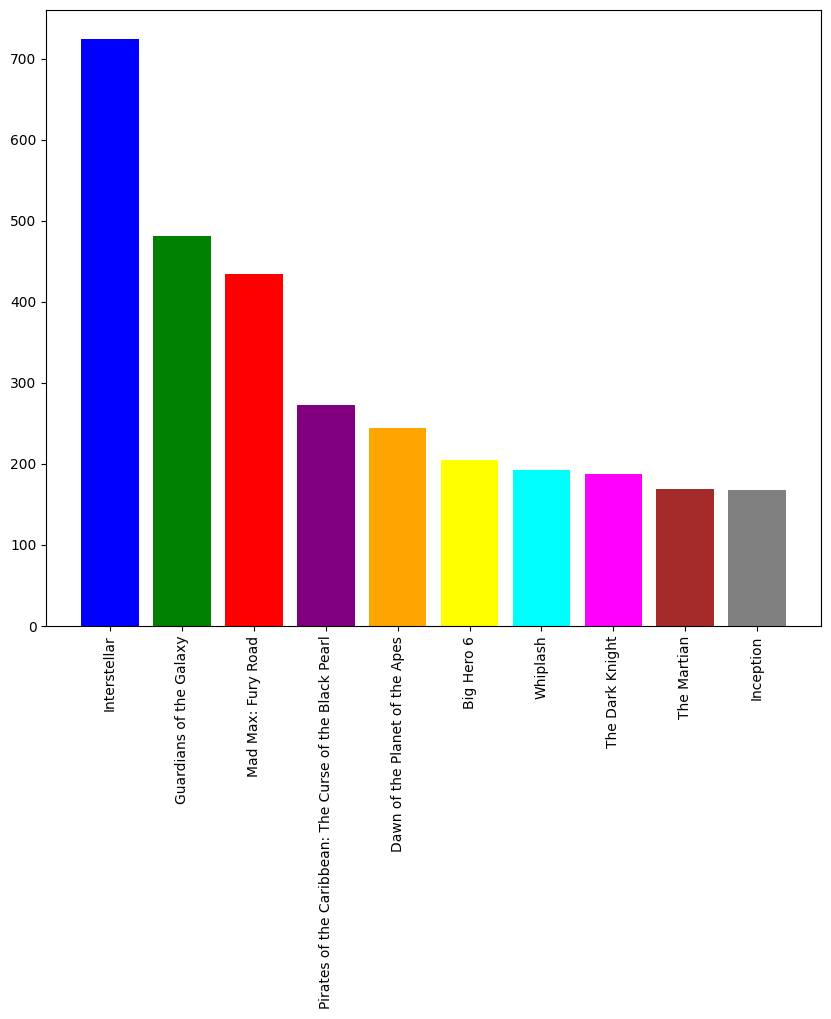

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
colores = ["blue", "green", "red", "purple", "orange", "yellow", "cyan", "magenta", "brown", "gray"]
ax.bar(top_10_peliculas["Título"],top_10_peliculas["Popularidad"],color=colores)
ax.set_xticklabels(top_10_peliculas["Título"], rotation=90)
plt.show()



PELICULAS GANADORAS DE OSCARS A LA MEJOR PELICULA

In [ ]:
ganadoras = master_pelis[master_pelis["Ganador de Oscar"] == True]

In [ ]:
ganadoras

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
0,Underworld,22000000,95708457,"[Fantasy, Action, Thriller]","[Lakeshore Entertainment, Laurinfilm, Subterra...","[Germany, Hungary, United Kingdom, United Stat...",WRITING (Original Story),2003-09-19,6.6,81.829237,[English],Ben Hecht,True,73708457
5,The Patriot,110000000,215294342,"[Drama, History, War, Action]","[Centropolis Entertainment, Columbia Pictures ...","[Germany, United States of America]",WRITING,2000-06-28,6.8,23.657284,[English],Hans Kraly,True,105294342
11,The Broadway Melody,379000,4358000,"[Drama, Music, Romance]",[Metro-Goldwyn-Mayer (MGM)],[United States of America],OUTSTANDING PICTURE,1929-02-08,5.0,0.968865,[English],Metro-Goldwyn-Mayer,True,3979000
23,Morning Glory,40000000,58785180,"[Comedy, Drama, Romance]","[Bad Robot, Goldcrest Pictures]",[United States of America],ACTRESS,2010-01-12,6.1,22.491388,"[English, Український]",Katharine Hepburn,True,18785180
25,A Farewell to Arms,4,25,"[Drama, Romance, War]",[Paramount Pictures],[United States of America],CINEMATOGRAPHY,1932-12-08,6.2,1.199451,[English],"Charles Bryant Lang, Jr.",True,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,Mad Max: Fury Road,150000000,378858340,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...","[Australia, United States of America]",SOUND EDITING,2015-05-13,7.2,434.278564,[English],Mark Mangini and David White,True,228858340
3259,Mad Max: Fury Road,150000000,378858340,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...","[Australia, United States of America]",SOUND MIXING,2015-05-13,7.2,434.278564,[English],"Chris Jenkins, Gregg Rudloff and Ben Osmo",True,228858340
3265,Spectre,245000000,880674609,"[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",MUSIC (Original Song),2015-10-26,6.3,107.376788,"[Français, English, Español, Italiano, Deutsch]",Music and Lyric by Jimmy Napes and Sam Smith,True,635674609
3266,Ex Machina,15000000,36869414,"[Drama, Science Fiction]","[DNA Films, Universal Pictures International (...",[United Kingdom],VISUAL EFFECTS,2015-01-21,7.6,95.130041,[English],"Andrew Whitehurst, Paul Norris, Mark Ardington...",True,21869414


In [ ]:
ganadoras["Categoría Nominada"].unique()

array(['WRITING (Original Story)', 'WRITING', 'OUTSTANDING PICTURE',
       'ACTRESS', 'CINEMATOGRAPHY', 'SOUND RECORDING', 'ACTOR',
       'DIRECTING', 'OUTSTANDING PRODUCTION', 'WRITING (Adaptation)',
       'ART DIRECTION (Color)', 'CINEMATOGRAPHY (Color)',
       'COSTUME DESIGN (Color)', 'SPECIAL EFFECTS', 'MAKEUP',
       'ASSISTANT DIRECTOR', 'SOUND', 'COSTUME DESIGN', 'MUSIC (Scoring)',
       'ACTRESS IN A SUPPORTING ROLE', 'ART DIRECTION', 'FILM EDITING',
       'WRITING (Screenplay)', 'MUSIC (Original Score)', 'MUSIC (Song)',
       'CINEMATOGRAPHY (Black-and-White)', 'ACTOR IN A SUPPORTING ROLE',
       'ART DIRECTION (Black-and-White)', 'OUTSTANDING MOTION PICTURE',
       'SPECIAL ACHIEVEMENT AWARD (Visual Effects)',
       'BEST MOTION PICTURE',
       'MUSIC (Music Score of a Dramatic or Comedy Picture)',
       'MUSIC (Scoring of a Musical Picture)',
       'WRITING (Motion Picture Story)', 'WRITING (Story and Screenplay)',
       'MUSIC (Original Dramatic Score)', 'MU

In [ ]:
mejor_peli = ganadoras[ganadoras["Categoría Nominada"].str.contains('BEST PICTURE')]

In [ ]:
mejor_peli

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
368,Titanic,200000000,1845034188,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],BEST PICTURE,1997-11-18,7.5,100.025899,"[English, Français, Deutsch, svenska, Italiano...","James Cameron and Jon Landau, Producers",True,1645034188
527,Lawrence of Arabia,15000000,69995385,"[Adventure, Drama, History, War]",[Horizon Pictures (II)],[United Kingdom],BEST PICTURE,1962-12-10,7.8,41.286336,"[العربية, English, Türkçe]","Sam Spiegel, Producer",True,54995385
557,Tom Jones,1000000,37600000,"[Adventure, Comedy, History, Romance]",[Woodfall Film Productions],[United Kingdom],BEST PICTURE,1963-10-06,6.1,2.833166,[English],"Tony Richardson, Producer",True,36600000
584,My Fair Lady,17000000,72070731,"[Drama, Family, Music, Romance]",[Warner Bros.],[United States of America],BEST PICTURE,1964-10-21,7.4,20.786616,[English],"Jack L. Warner, Producer",True,55070731
630,The Sound of Music,8200000,286214286,"[Drama, Family, Music, Romance]","[Twentieth Century Fox Film Corporation, Rober...",[United States of America],BEST PICTURE,1965-03-02,7.4,37.960289,"[English, Français, Italiano]","Robert Wise, Producer",True,278014286
651,A Man for All Seasons,3900000,28350000,"[Drama, History]","[Columbia Pictures Corporation, Highland Films]",[United Kingdom],BEST PICTURE,1966-12-12,7.5,9.541688,"[English, Français, Latin, Español]","Fred Zinnemann, Producer",True,24450000
680,Oliver!,10000000,37402877,"[Drama, Family, Music]","[Columbia Pictures Corporation, Warwick Film P...",[United Kingdom],BEST PICTURE,1968-09-26,7.0,8.305998,[English],"John Woolf, Producer",True,27402877
701,Midnight Cowboy,3600000,44785053,[Drama],"[United Artists, Florin Productions, Jerome He...",[United States of America],BEST PICTURE,1969-05-25,7.4,21.119209,"[English, Italiano]","Jerome Hellman, Producer",True,41185053
734,Patton,12000000,89800000,"[Drama, History, War]",[Twentieth Century Fox Film Corporation],[United States of America],BEST PICTURE,1970-01-25,7.3,21.933822,[English],"Frank McCarthy, Producer",True,77800000
756,The French Connection,1800000,41158757,"[Action, Crime, Thriller]","[Twentieth Century Fox Film Corporation, D'Ant...",[United States of America],BEST PICTURE,1971-10-09,7.4,15.978136,"[English, Français]","Philip D'Antoni, Producer",True,39358757


In [ ]:
mejor_peli

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
368,Titanic,200000000,1845034188,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],BEST PICTURE,1997-11-18,7.5,100.025899,"[English, Français, Deutsch, svenska, Italiano...","James Cameron and Jon Landau, Producers",True,1645034188
527,Lawrence of Arabia,15000000,69995385,"[Adventure, Drama, History, War]",[Horizon Pictures (II)],[United Kingdom],BEST PICTURE,1962-12-10,7.8,41.286336,"[العربية, English, Türkçe]","Sam Spiegel, Producer",True,54995385
557,Tom Jones,1000000,37600000,"[Adventure, Comedy, History, Romance]",[Woodfall Film Productions],[United Kingdom],BEST PICTURE,1963-10-06,6.1,2.833166,[English],"Tony Richardson, Producer",True,36600000
584,My Fair Lady,17000000,72070731,"[Drama, Family, Music, Romance]",[Warner Bros.],[United States of America],BEST PICTURE,1964-10-21,7.4,20.786616,[English],"Jack L. Warner, Producer",True,55070731
630,The Sound of Music,8200000,286214286,"[Drama, Family, Music, Romance]","[Twentieth Century Fox Film Corporation, Rober...",[United States of America],BEST PICTURE,1965-03-02,7.4,37.960289,"[English, Français, Italiano]","Robert Wise, Producer",True,278014286
651,A Man for All Seasons,3900000,28350000,"[Drama, History]","[Columbia Pictures Corporation, Highland Films]",[United Kingdom],BEST PICTURE,1966-12-12,7.5,9.541688,"[English, Français, Latin, Español]","Fred Zinnemann, Producer",True,24450000
680,Oliver!,10000000,37402877,"[Drama, Family, Music]","[Columbia Pictures Corporation, Warwick Film P...",[United Kingdom],BEST PICTURE,1968-09-26,7.0,8.305998,[English],"John Woolf, Producer",True,27402877
701,Midnight Cowboy,3600000,44785053,[Drama],"[United Artists, Florin Productions, Jerome He...",[United States of America],BEST PICTURE,1969-05-25,7.4,21.119209,"[English, Italiano]","Jerome Hellman, Producer",True,41185053
734,Patton,12000000,89800000,"[Drama, History, War]",[Twentieth Century Fox Film Corporation],[United States of America],BEST PICTURE,1970-01-25,7.3,21.933822,[English],"Frank McCarthy, Producer",True,77800000
756,The French Connection,1800000,41158757,"[Action, Crime, Thriller]","[Twentieth Century Fox Film Corporation, D'Ant...",[United States of America],BEST PICTURE,1971-10-09,7.4,15.978136,"[English, Français]","Philip D'Antoni, Producer",True,39358757


In [ ]:
mejor_peli

,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
368,Titanic,200000000,1845034188,"[Drama, Romance, Thriller]","[Paramount Pictures, Twentieth Century Fox Fil...",[United States of America],BEST PICTURE,1997-11-18,7.5,100.025899,"[English, Français, Deutsch, svenska, Italiano...","James Cameron and Jon Landau, Producers",True,1645034188
527,Lawrence of Arabia,15000000,69995385,"[Adventure, Drama, History, War]",[Horizon Pictures (II)],[United Kingdom],BEST PICTURE,1962-12-10,7.8,41.286336,"[العربية, English, Türkçe]","Sam Spiegel, Producer",True,54995385
557,Tom Jones,1000000,37600000,"[Adventure, Comedy, History, Romance]",[Woodfall Film Productions],[United Kingdom],BEST PICTURE,1963-10-06,6.1,2.833166,[English],"Tony Richardson, Producer",True,36600000
584,My Fair Lady,17000000,72070731,"[Drama, Family, Music, Romance]",[Warner Bros.],[United States of America],BEST PICTURE,1964-10-21,7.4,20.786616,[English],"Jack L. Warner, Producer",True,55070731
630,The Sound of Music,8200000,286214286,"[Drama, Family, Music, Romance]","[Twentieth Century Fox Film Corporation, Rober...",[United States of America],BEST PICTURE,1965-03-02,7.4,37.960289,"[English, Français, Italiano]","Robert Wise, Producer",True,278014286
651,A Man for All Seasons,3900000,28350000,"[Drama, History]","[Columbia Pictures Corporation, Highland Films]",[United Kingdom],BEST PICTURE,1966-12-12,7.5,9.541688,"[English, Français, Latin, Español]","Fred Zinnemann, Producer",True,24450000
680,Oliver!,10000000,37402877,"[Drama, Family, Music]","[Columbia Pictures Corporation, Warwick Film P...",[United Kingdom],BEST PICTURE,1968-09-26,7.0,8.305998,[English],"John Woolf, Producer",True,27402877
701,Midnight Cowboy,3600000,44785053,[Drama],"[United Artists, Florin Productions, Jerome He...",[United States of America],BEST PICTURE,1969-05-25,7.4,21.119209,"[English, Italiano]","Jerome Hellman, Producer",True,41185053
734,Patton,12000000,89800000,"[Drama, History, War]",[Twentieth Century Fox Film Corporation],[United States of America],BEST PICTURE,1970-01-25,7.3,21.933822,[English],"Frank McCarthy, Producer",True,77800000
756,The French Connection,1800000,41158757,"[Action, Crime, Thriller]","[Twentieth Century Fox Film Corporation, D'Ant...",[United States of America],BEST PICTURE,1971-10-09,7.4,15.978136,"[English, Français]","Philip D'Antoni, Producer",True,39358757


In [ ]:
mejor_peli["Fecha de Estreno"] = pd.to_datetime(mejor_peli['Fecha de Estreno'])

mejor_peli_2010_2023 = (mejor_peli["Fecha de Estreno"].dt.year >= 2010) & (mejor_peli["Fecha de Estreno"].dt.year <= 2024) # crear una máscara booleana para las fechas de estreno entre 2010 y 2023
ganadoras_seleccionadas = mejor_peli[mejor_peli_2010_2023]


C:\Users\keyke\AppData\Local\Temp\ipykernel_22692\2544936283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mejor_peli["Fecha de Estreno"] = pd.to_datetime(mejor_peli['Fecha de Estreno'])


In [ ]:
ganadoras_seleccionadas


,Título,Presupuesto,Recaudación,Género,Productora,País de Prodrucción,Categoría Nominada,Fecha de Estreno,Puntuacion de los Criticos y Espectadores,Popularidad,Idioma Original,Nombre de candidatos,Ganador de Oscar,Beneficio
2775,The King's Speech,15000000,414211549,"[Drama, History]","[The Weinstein Company, UK Film Council, Bedla...",[United Kingdom],BEST PICTURE,2010-09-06,7.6,54.053576,[English],"Iain Canning, Emile Sherman and Gareth Unwin, ...",True,399211549
2850,The Artist,15000000,133432856,"[Drama, Comedy, Romance]","[France 3 Cinéma, La Petite Reine, Studio 37, ...","[Belgium, France]",BEST PICTURE,2011-05-15,7.3,29.943316,[Français],"Thomas Langmann, Producer",True,118432856
2962,Argo,44500000,232324128,"[Drama, Thriller]","[GK Films, Warner Bros., Smokehouse Pictures]",[United States of America],BEST PICTURE,2012-10-11,7.1,62.010560,"[English, فارسی]","Grant Heslov, Ben Affleck and George Clooney, ...",True,187824128
3048,12 Years a Slave,20000000,187000000,"[Drama, History]","[Plan B Entertainment, Regency Enterprises, Ri...","[United States of America, United Kingdom]",BEST PICTURE,2013-10-18,7.9,95.922900,[English],"Brad Pitt, Dede Gardner, Jeremy Kleiner, Steve...",True,167000000
3228,Spotlight,20000000,88346473,"[Drama, Thriller, History]","[Universal Pictures, Participant Media, Anonym...","[Canada, United States of America]",BEST PICTURE,2015-11-06,7.8,41.503588,[English],"Michael Sugar, Steve Golin, Nicole Rocklin and...",True,68346473


In [ ]:
ganadoras_seleccionadas["Presupuesto"],type


(2775    15000000
 2850    15000000
 2962    44500000
 3048    20000000
 3228    20000000
 Name: Presupuesto, dtype: int32,
 type)

Text(0.5, 1.0, 'Relación entre presupuesto y beneficio')

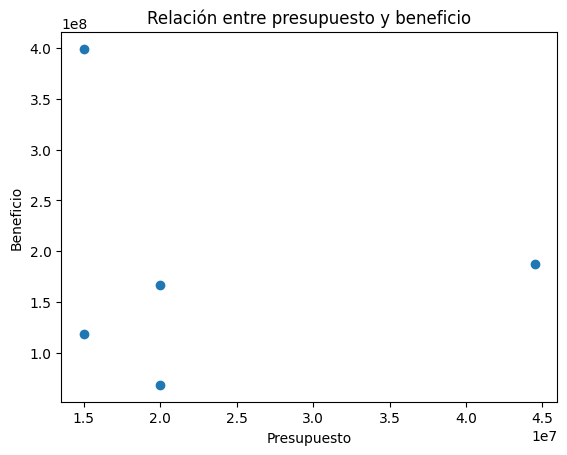

In [ ]:
plt.scatter(ganadoras_seleccionadas["Presupuesto"],ganadoras_seleccionadas ["Beneficio"])
plt.xlabel('Presupuesto')
plt.ylabel('Beneficio')
plt.title('Relación entre presupuesto y beneficio')

HIPOTESISI 

¿Existe correlación entre el presupuesto y la recaudación de las películas?

In [ ]:
correlacion = master_pelis[['Presupuesto', 'Recaudación']].corr()
print(correlacion)


             Presupuesto  Recaudación
Presupuesto     1.000000     0.498908
Recaudación     0.498908     1.000000


Se puede observar que existe una correlación positiva (0.732214) entre ambas variables, lo que sugiere que a medida que aumenta el presupuesto, también aumenta la recaudación. 

In [ ]:

corr, p = pearsonr(master_pelis['Presupuesto'], master_pelis['Recaudación'])
print('La correlación de Pearson entre el presupuesto y la recaudación es:', corr)

La correlación de Pearson entre el presupuesto y la recaudación es: 0.4989075067055376


¿Hay correlación entre el indice de Puntuación de los criticos y la Popularidad? 

In [ ]:
correlation = master_pelis[['Puntuacion de los Criticos y Espectadores', 'Popularidad']].corr(method='pearson')
print(correlation)


                                           Puntuacion de los Criticos y Espectadores  \
Puntuacion de los Criticos y Espectadores                                   1.000000   
Popularidad                                                                 0.334355   

                                           Popularidad  
Puntuacion de los Criticos y Espectadores     0.334355  
Popularidad                                   1.000000  


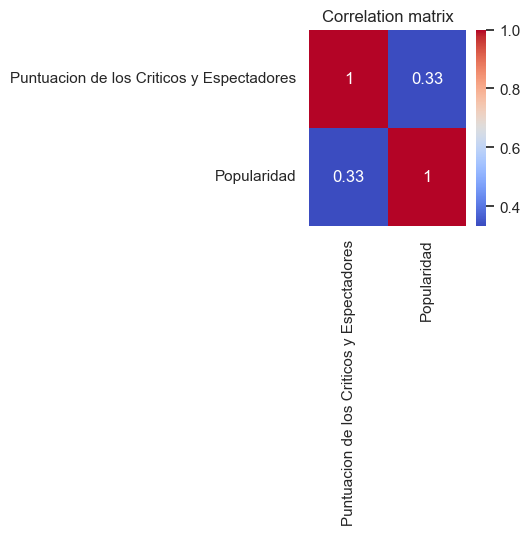

In [ ]:
correlation = master_pelis[['Puntuacion de los Criticos y Espectadores', 'Popularidad']].corr(method='pearson')

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()



In [ ]:
correlation = master_pelis[['Puntuacion de los Criticos y Espectadores', 'Popularidad']].corr(method='spearman')
print(correlation)


                                           Puntuacion de los Criticos y Espectadores  \
Puntuacion de los Criticos y Espectadores                                   1.000000   
Popularidad                                                                 0.436509   

                                           Popularidad  
Puntuacion de los Criticos y Espectadores     0.436509  
Popularidad                                   1.000000  
